In [3]:
from keras.datasets import imdb
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

In [4]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in X_train[0]]) # 0, 1, 2 - symbolizes sth

In [5]:
decoded_review[:30]

'? this film was just brilliant'

In [6]:
len(X_train[1]), len(X_train[0]) # rozne dlugosci!

(189, 218)

In [7]:
import numpy as np

def vectorize_sequences(sequences, dimensions=10000):
    results = np.zeros((len(sequences), dimensions))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [8]:
X_train = vectorize_sequences(X_train)
X_test = vectorize_sequences(X_test)

In [9]:
X_train.shape

(25000, 10000)

In [10]:
y_test = np.float32(y_test)
y_train = y_train.astype('float32')

In [11]:
from keras.models import Sequential
from keras.layers import Dense

In [13]:
model = Sequential([
    Dense(16, activation='relu', input_shape=(10000,)), # (10000,) because it is (10000, any batch_size)
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                160016    
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
from keras import losses, metrics, optimizers
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [17]:
X_val = X_train[:10000]
X_train = X_train[10000:]

y_val = y_train[:10000]
y_train = y_train[10000:]

In [18]:
history = model.fit(X_train, y_train, epochs=20, batch_size=512, validation_data=(X_val, y_val))

Epoch 1/20
21/30 [====================>.........] - ETA: 0s - loss: 0.5593 - binary_accuracy: 0.7456

2023-03-02 21:48:33.207138: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


30/30 [==============================] - 1s 22ms/step - loss: 0.5141 - binary_accuracy: 0.7827 - val_loss: 0.3945 - val_binary_accuracy: 0.8562
Epoch 2/20
30/30 [==============================] - 0s 9ms/step - loss: 0.3027 - binary_accuracy: 0.9025 - val_loss: 0.3247 - val_binary_accuracy: 0.8696
Epoch 3/20
30/30 [==============================] - 0s 9ms/step - loss: 0.2220 - binary_accuracy: 0.9266 - val_loss: 0.2902 - val_binary_accuracy: 0.8836
Epoch 4/20
30/30 [==============================] - 0s 8ms/step - loss: 0.1720 - binary_accuracy: 0.9428 - val_loss: 0.2750 - val_binary_accuracy: 0.8906
Epoch 5/20
30/30 [==============================] - 0s 9ms/step - loss: 0.1415 - binary_accuracy: 0.9554 - val_loss: 0.2843 - val_binary_accuracy: 0.8868
Epoch 6/20
30/30 [==============================] - 0s 9ms/step - loss: 0.1151 - binary_accuracy: 0.9653 - val_loss: 0.2972 - val_binary_accuracy: 0.8839
Epoch 7/20
30/30 [==============================] - 0s 9ms/step - loss: 0.0990 - binar

In [19]:
import tensorflow as tf
tf.keras.backend.clear_session()

In [20]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

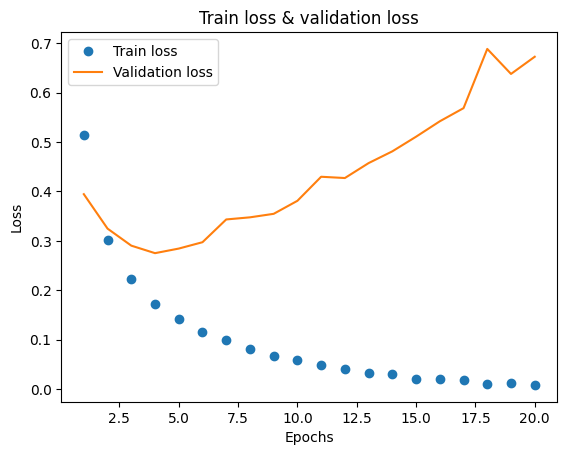

In [21]:
import matplotlib.pyplot as plt
x = np.arange(1,21)
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']
plt.title('Train loss & validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(x, train_loss, 'o', label='Train loss')
plt.plot(x, val_loss, label='Validation loss')
plt.legend()
plt.show()

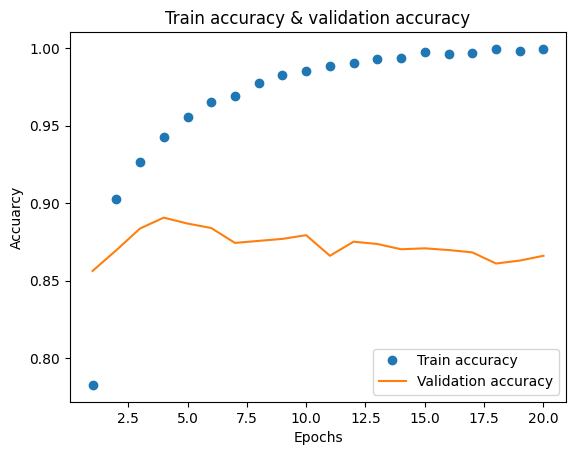

In [22]:
train_acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']
plt.title('Train accuracy & validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.plot(x, train_acc, 'o', label="Train accuracy")
plt.plot(x, val_acc, label="Validation accuracy")
plt.legend()
plt.show()

<b>Overfitting! It would be necessary to re-train the model on only 4 epochs.</b>

In [23]:
model.predict(X_test)

782/782 [==============================] - 1s 773us/step


array([[0.01114358],
       [1.        ],
       [0.763328  ],
       ...,
       [0.00238205],
       [0.02469992],
       [0.9120366 ]], dtype=float32)